**Text Classification with NLP in Google Colab**

This lab demonstrates how to build and train neural networks for text classification using TensorFlow/Keras. We'll use the IMDB movie review dataset to classify sentiment (positive/negative).

**Step 1: Setup Colab Environment**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Check TensorFlow version and GPU
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.18.0
GPU available: []


**Step 2: Load and Explore IMDB Dataset**

In [ ]:
# Load IMDB dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Decode first review
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print("Training samples:", len(train_data))
print("Test samples:", len(test_data))
print("\nFirst review (decoded):")
print(decoded_review[:200], "...")  # Show first 200 chars

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 25000
Test samples: 25000

First review (decoded):
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the sa ...


**Step 3: Preprocess Text Data**

In [ ]:
# Vectorize sequences (multi-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("\nVectorized training data shape:", X_train.shape)


Vectorized training data shape: (25000, 10000)


**Step 4: Build Text Classification Model**

In [ ]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train and Evaluate**

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.5596 - loss: 0.6763 - val_accuracy: 0.8273 - val_loss: 0.5506
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7424 - loss: 0.5486 - val_accuracy: 0.8671 - val_loss: 0.4071
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8196 - loss: 0.4366 - val_accuracy: 0.8790 - val_loss: 0.3299
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8655 - loss: 0.3592 - val_accuracy: 0.8877 - val_loss: 0.2877
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8915 - loss: 0.3015 - val_accuracy: 0.8895 - val_loss: 0.2738
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9164 - loss: 0.2480 - val_accuracy: 0.8898 - val_loss: 0.2710
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9289 - loss: 0.2195 - val_accuracy: 0.8898 - val_loss: 0.2794
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9384 - loss: 0.1922 - val_accuracy: 0.8897 - 

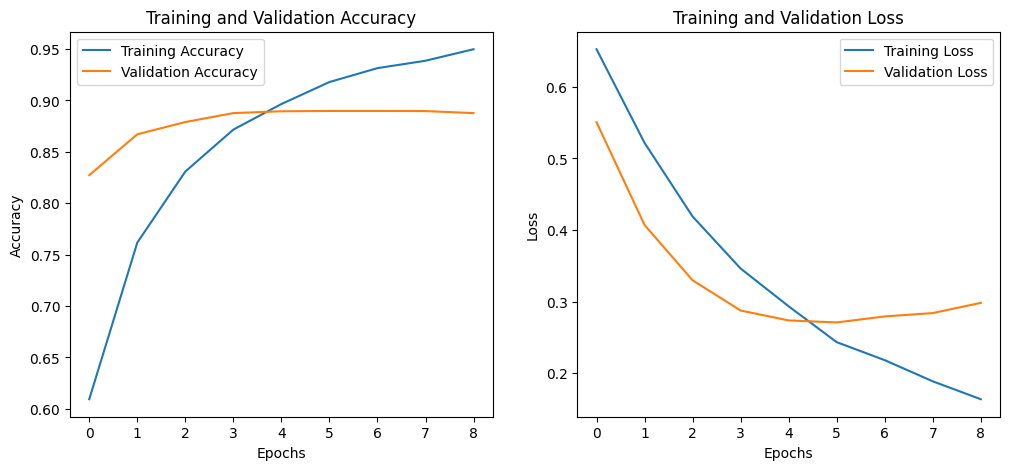

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8836 - loss: 0.2866

Test Accuracy: 0.8851
Test Loss: 0.2854


In [ ]:
# Create validation set
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

# Train model
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

**Step 6: Using Embedding Layer (Alternative Approach)**

In [ ]:
# Load raw text data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to same length
maxlen = 200
X_train = keras.preprocessing.sequence.pad_sequences(
    train_data, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(
    test_data, maxlen=maxlen)

# Build model with Embedding layer
embedding_model = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=maxlen),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

embedding_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

embedding_model.summary()

# Train embedding model
history = embedding_model.fit(
    X_train, train_labels,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5981 - loss: 0.6899 - val_accuracy: 0.7234 - val_loss: 0.6723
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7205 - loss: 0.6642 - val_accuracy: 0.7628 - val_loss: 0.6286
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7677 - loss: 0.6141 - val_accuracy: 0.7872 - val_loss: 0.5632
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8059 - loss: 0.5434 - val_accuracy: 0.8218 - val_loss: 0.4929
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8347 - loss: 0.4701 - val_accuracy: 0.8362 - val_loss: 0.4354
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8517 - loss: 0.4100 - val_accuracy: 0.8458 - val_loss: 0.3948
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8660 - loss: 0.3658 - val_accuracy: 0.8534 - val_loss: 0.3665
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8781 - loss: 0.3332 - val_accuracy: 0.8584 - v

**Step 7: Save Model and Make Predictions**

In [ ]:
# Save model
model.save('imdb_classifier.h5')

# Load model
loaded_model = keras.models.load_model('imdb_classifier.h5')

# Create prediction function
def predict_sentiment(text):
    # Simple tokenization (for demo only - use proper tokenizer in production)
    words = text.lower().split()
    word_indices = [word_index.get(word, 0) for word in words]
    vectorized = vectorize_sequences([word_indices])
    prediction = loaded_model.predict(vectorized)[0][0]
    return "Positive" if prediction > 0.5 else "Negative", prediction

# Test prediction
sample_review = "This movie was absolutely fantastic and I loved every minute of it"
sentiment, confidence = predict_sentiment(sample_review)
print(f"\nReview: '{sample_review}'")
print(f"Prediction: {sentiment} (confidence: {confidence:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Review: 'This movie was absolutely fantastic and I loved every minute of it'
Prediction: Negative (confidence: 0.3508)
